In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv(r"C:\CODE\tropical_cyclone_size\tropical_cyclone_size.csv")
df.head()

,Cyclone Number,Time,Latitude,Longitude,Pressure,Wind Speed,SiR34,SATSer
0,8003,1980-04-06 06:00:00,15.97,177.20,987,27.5,182.9,GOE-3
1,8003,1980-04-06 18:00:00,17.90,178.28,987,25.9,140.8,GOE-3
2,8003,1980-04-07 00:00:00,18.75,179.01,992,22.2,111.6,GOE-3
3,8003,1980-04-07 06:00:00,19.40,179.68,994,22.1,125.5,GOE-3
4,8015,1980-08-08 12:00:00,14.15,157.04,996,17.6,139.8,GOE-3


Split dataset

In [3]:
X = df[['Latitude','Longitude', 'Pressure', 'Wind Speed']]
y = df[['SiR34']]

Correlation matrix

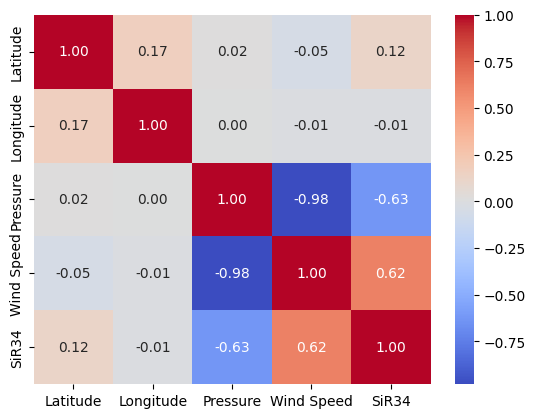

In [4]:
df_corr = df[['Latitude','Longitude', 'Pressure', 'Wind Speed', 'SiR34']]
corr = df_corr.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm',fmt='.2f')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

(10497, 4)
(4500, 4)
(10497, 1)
(4500, 1)


In [6]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Try save the model

In [7]:
import pickle

with open('rf_regressor.pkl','wb') as model_file:
    pickle.dump(rf_regressor, model_file)